In [287]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import base64
import string
import seaborn as sns
import spacy
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
#nltk.download()
stopwords = stopwords.words('english')
df = pd.read_csv(r'C:\Users\krmal\Desktop\Seattle Testing Conference\AutomationSmokeReport.csv')
df.head(9)

AttributeError: 'LazyConfigValue' object has no attribute 'lower'

   error_id                             error_description
0         1            clickable: By.id: deleteBookingBtn
1         2            clickable: By.id: deleteBookingBtn
2         3                       invalid car rental rate
3         4                      By.id: tabSelectionTable
4         5                          By.id: searchResults
5         6               clickable: By.id: newCarBooking
6         7                          Modal dialog present
7         8  By.xpath: //header[@data-hook='main_header']
8         9               clickable: By.id: newCarBooking

In [288]:
df.shape

(19, 2)

In [289]:
df.isnull().sum()

error_id             0
error_description    0
dtype: int64

In [290]:
 df['error_description'].nunique()

7

In [291]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=10)

In [292]:
print('Error Description:', train['error_description'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Error Description: clickable: By.id: newCarBooking
Training Data Shape: (12, 2)
Testing Data Shape: (7, 2)


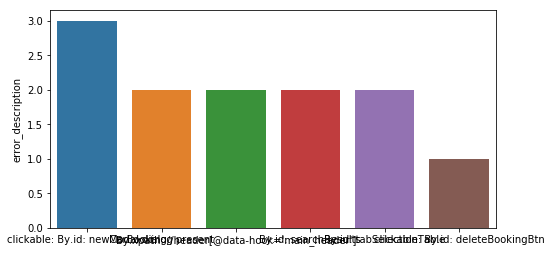

In [297]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['error_description'].unique(), y=train['error_description'].value_counts())
plt.show()

In [294]:
import spacy

punctuations = string.punctuation

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [298]:
INFO_text = [text for text in train[train['error_description'] == 'id']['error_description']]

IS_text = [text for text in train[train['error_description'] == 'header']['error_description']]

INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()

IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()

INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)

In [299]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy

from spacy.lang.en import English
parser = English()

In [300]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

In [301]:
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

('valid', 'valid') similarity lies in 1.0
('valid', 'car') similarity lies in 0.17651653
('valid', 'rental') similarity lies in 0.30521733
('valid', 'rate') similarity lies in 0.15893394
('valid', 'searchResults') similarity lies in -0.15918036
('valid', 'tabSelectionTable') similarity lies in 0.129757
('car', 'valid') similarity lies in 0.17651653
('car', 'car') similarity lies in 1.0
('car', 'rental') similarity lies in 0.60824597
('car', 'rate') similarity lies in 0.6601183
('car', 'searchResults') similarity lies in 0.2943365
('car', 'tabSelectionTable') similarity lies in 0.14256416
('rental', 'valid') similarity lies in 0.30521733
('rental', 'car') similarity lies in 0.60824597
('rental', 'rental') similarity lies in 1.0
('rental', 'rate') similarity lies in 0.6672808
('rental', 'searchResults') similarity lies in 0.18437923
('rental', 'tabSelectionTable') similarity lies in 0.14051679
('rate', 'valid') similarity lies in 0.15893394
('rate', 'car') similarity lies in 0.6601183
('

<Figure size 1440x720 with 0 Axes>

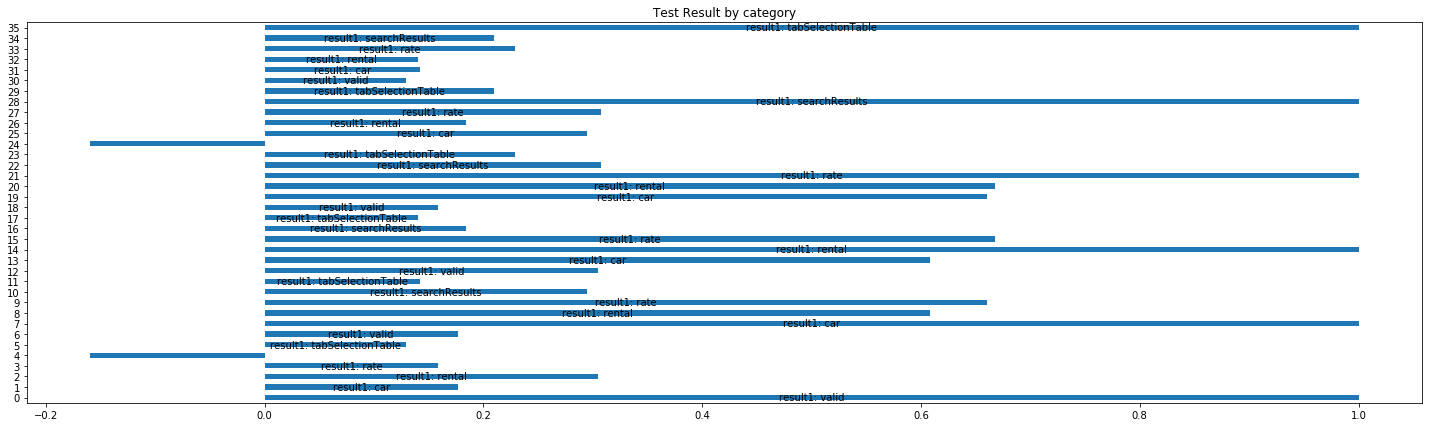

<Figure size 576x288 with 0 Axes>

In [302]:
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
#import seaborn as sns
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

value1=nlp("valid car rental rate")
value2=nlp("searchResults")
value3=nlp("tabSelectionTable")
value1.similarity(value3)
testresult=nlp("valid car rental rate searchResults tabSelectionTable")

for result1 in testresult:
    for result2 in testresult:
        print((result1.text,result2.text),"similarity lies in",result1.similarity(result2))
        
finalreport=[(result1.text,result2.text,result1.similarity(result2))for result2 in testresult for result1 in testresult]

df=pd.DataFrame(finalreport)
df.head()

df.corr()

df.columns=["result1","result2","similarity"]

plt.figure(figsize=(20,10))
#sns.heatmap(df_viz.corr(),annot=True)
plt.show()
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

ax = df.plot.barh(title="Test Result by category", legend=False, figsize=(25,7), stacked=True)

labels = []
for j in df:
    for i in df.index:
        label = str(j)+": " + str(df.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()
resultfile1=open(r"C:\NLP\errorfile1.csv").read()
file1=nlp(resultfile1)

resultfile2=open(r"C:\NLP\errorfile1.csv").read()

fig = plt.figure(figsize=(8,4))
#plt.barplot(x = train['404'].unique(), y=train['404'].value_counts())
plt.show()
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

In [217]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Group 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Group 2 best: ")
    for feat in topClass2:
        print(feat)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

# data
train1 = train['error_descp'].tolist()
labelsTrain1 = train['error_descp'].tolist()

# train
pipe.fit(train1,labelsTrain1)
# test
preds = pipe.predict(train1)
#print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 5 Label Values used to predict:-")

printNMostInformative(vectorizer, clf, 10)

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)
vocab = vectorizer.get_feature_names()

for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

Top 5 Label Values used to predict:-
Group 1 best: 
(-0.4427177850636082, 'tabselectiontable')
(-0.37947921085078506, 'clickable')
(-0.18975901300183073, 'deletebookingbtn')
(-0.18972019784895422, 'newcarbooking')
(-0.1701937991427418, '//header[@data')
(-0.1701937991427418, 'by.xpath')
(-0.1701937991427418, "hook='main_header")
(-0.17018876548230855, 'dialog')
(-0.17018876548230855, 'modal')
(-0.17018876548230855, 'present')
Group 2 best: 
(0.8906131558590401, 'searchresults')
(0.06841615994464692, 'by.id')
(-0.13236948905280363, 'valid')
(-0.13236948905280363, 'rental')
(-0.13236948905280363, 'rate')
(-0.13236948905280363, 'car')
(-0.17018876548230855, 'present')
(-0.17018876548230855, 'modal')
(-0.17018876548230855, 'dialog')
(-0.1701937991427418, "hook='main_header")
